# Graphical models

## Bayesian networks

directed graphical models detailing how each variable affects another

directed acyclic graph (DAG) - no looping paths

$P(X_1, ..., X_n) = \prod_i P(X_i \mid parents(X_i))$

**e.g.** given joint distribution over $X_1, ..., X_n$ as $P(X_1, X_2, ..., X_n)$

can write as $P(X_1) P(X_2 | X_1) P(X_3 | X_2, X_1) P(X_4 | X_3, X_2, X_1) \cdots$

but there may not be all direct dependencies (conditional independence)

perhaps $X_4$ depends on $X_2$ and $X_3$ but not directly on $X_1$  
then even if $X_2$ and $X_3$ depend directly on $X_1$, we can write 
$P(X_4 | X_3, X_2, X_1) = P(X_4 | X_3, X_2)$

**e.g.** bayesian linear regression

$t_i$ is generated by $w$, $\phi(x_i)$, and $\sigma$ where we observe $t_i$ and $\phi(x_i)$

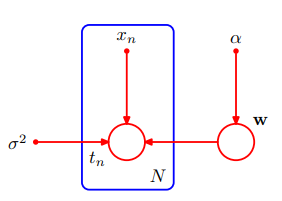

**e.g.** generative model

$t_i \sim Discrete(\{p_j\}_{j=0}^k)$  
$x_i \mid t_i \sim \mathcal{N}(\mu_{t_i}, \Sigma_{t_i})$

so $x_i$ depend on $t_i, \mu_j, \Sigma_j$

things we would like to solve

* $p(x_k) = \int_{x_1} \int_{x_2} \cdots \int_{x_{k-1}} \int_{x_{k+1}} \cdots \int_{x_n} p(x_1, ..., x_n) dx_1 \cdots dx_n$
* $p(x_k | x_1 = a, x_2 = b, ...)$
* $\arg\max_{x_k} p(x_k | x_1 = a, ...)$

**def** markov blanket

given $children(z)$, $parents(z)$, $parents(children(z))$ observed, $z$ is conditionally independent of all other variables

**def** markov random field

* given an undirected graph $G = V, E$
* for any clique (fully connected subgraph) $C \subset V$, we can write a potential function  
$\psi_C(C) \geq 0$  
note that $C$ is a set of vertices, e.g., if $|C_k| = 3$, then $C_k = \{0, 0, 0\}, \{0, 0, 1\}, \{0, 1, 0\}$, etc.
* then the joint probability  
$p(x_1, ..., x_n) = \frac{1}{Z} \prod_k \psi_{C_k} (C_k)$  
where $Z = \sum_{x_1, ..., x_n} \prod_k \psi_{C_k} (C_k)$  
$x_k \in \{0, 1\}$

**def** factor graph

two types of nodes

* random variables
* factors (similar to potential functions)

## Inference on networks

**e.g.** 

we wish to know $P(X_5 \mid X_1 = x_1, X_8 = x_8)$  
$= \sum_{X_2, X_3, X_4, X_6, X_7, X_9, X_{10}} P(X_1 = x_1) P(X_2) P(X_3) P(X_4 | x_1, X_2, X_3) P(X_6) P(X_5 | X_4, X_6) P(X_7 | X_5) P(X_8 = x_8 | X_5) P(X_{10}) P(X_9 | X_5, X_{10})$

but we can simplify this first

first sum over $X_7$ since it has one parent and no children:  
$\sum \cdots \sum_{X_7} P(X_7 | X_5)$  
then we note that $\sum_{X_7} P(X_7 | X_5) = 1$ since it is a probability

we can try to remove $X_{10}$ which has no parents but one child $X_9$ (which has parents $X_5, X_{10}$ and no children  
then we get  
$\sum \cdots \sum_{X_{10}} P(X_{10}) P(X_9 | X_{10}, X_5)$  
$= f_{X_{10}}(x_9, x_5)$

this is called ***variable elimination***

### belief propagation

## MCMC

transitions constructed such that the stationary distribution of the markov chain is the posterior distribution which we want to approximate  
taking a long walk in the markov chain and using the last step serves as an implementation of sampling from the posterior  
repeat many times to get multiple posterior samples

**def** $p(\cdot)$ is stationary for $T(\cdot)$ iff $\forall s_i$, $p(s_i) = \sum_j p(s_j) T(s_i | s_j)$

guaranteed to exist under some conditions on markov chains

### Gibbs sampling

to sample from distribution over $V_1, ..., V_n$:  
repeat:

1. pick $i \in \{1, .., n\}$ uniformly
2. draw new value for $V_i$ from $p(v_i \mid v_1, ..., v_{i-1}, v_{i+1}, ..., v_n\}$

**e.g.** 

* graphical model $X \to Y \to Z$
* $X \sim Bernoulli(.6)$
* $Y$ can be $a, b, c$ s.t. $p(a, b, c \mid X=1) = (.3, .3 .6)$ and $p(a, b, c | X=0) = (.1, .6, .3)$
* $Z$ is binary s.t. $p(z | Y=a) = .2$, $p(z | Y=b) = .4$, $p(z | Y=c) = .5$
* current sample is $(X, Y, Z) = (0, b, 1)$

then to resample $Y$,  
$p(y) \propto p(x) p(y|x) p(z|y)$  
then we compute this for each $a, b, c$, fixing $X=0$ and $Z=1$,  
then normalize

### Metropolis Hastings sampling

to sample from distribution over $V_1, ..., V_n$  
define proposal distribution $q(V' | V)$ s.t. $V, V'$ are assignments to all variables  
repeat:

1. sample $V' \sim q(V' | V)$
2. calculate $A = \min(1, \frac{p(V') q(V | V')}{p(V) q(V'|V)})$
3. with probability $A$, let $V \leftarrow V'$

detailed balance

* $p$ is the intended distribution
* $T$ are the transitions of the markov chain

$p(a) T(b | a) = p(b) T(a | b)$

1. detailed balance for $p$ $\implies$ $p$ is stationary for the markov chain  
$\sum_j p(s_j) T(s_i | s_j)$  
$= \sum_j p(s_i) T(s_j | s_i)$  
$= p(s_i) \sum_j T(s_j | s_i)$  
$= p(s_i)$
2. MH statisfies detailed balance for $p$  
$p(a) T(b | a)$  
$= p(a) q(b | a) A$  
$= \min(p(a) q(b | a), p(b) q(a | b))$  
$= p(b) q(a | b) \min(1, \frac{p(a) q(b | a)}{p(b) q(a | b)})$  
$= p(b) T(a | b)$
3. Gibbs is MH with $A=1$ at every sampling iteration  
let $x$ be the current state, and write it as $\tilde{x}_i, x_r$ s.t. $x_r$ is the rest of the string and $\tilde{x}_i$ is the current value of $x_i$  
let $y = \hat{x}_i, x_r$ be a potential next state  
the proposal distribution is through the conditional probability: $q(y | x) = p(\hat{x}_i | x_r)$  
then the numerator is the same as the denominator in $A$, so we just get $A=1$  
$p(y) T(x | y) = p(\hat{x}_i, x_r) p(\tilde{x}_i | x_r)$  
$= p(\hat{x}_i | x_r) p(x_r) p(\tilde{x}_i | x_r)$  
$= p(\hat{x} | x_r) p(\tilde{x}_i, x_r)$  
$= p(x) T(y | x)$

## Latent dirichlet analysis

**def** dirichlet distribution

* let $\mu = \begin{bmatrix} \mu_1 \\ \vdots \\ \mu_k \end{bmatrix}$ 
such that $\sum_i \mu_i = 1$
* let $\alpha \in \mathbb{R}^k$ and define $\alpha_0 = \sum_i \alpha_i$
* then $\mu \sim Dirichlet(\alpha)$ iff 
$p(\mu) = \frac{\Gamma(\alpha_0)}{\prod \Gamma(\alpha_i)} \prod \mu_i^{\alpha_i - 1}$

dirichlet is a conjugate prior for a multivariate distribution

**def** generative model for LDA

* for each $d$, draw $\theta_{k | d} \sim Dirichlet(\theta_d | \alpha)$
* for each $k$, draw $\phi_{i | k} \sim Dirichlet(\phi_k | \beta)$
* for each $d$, for each location $j$ in $d$, 
    * draw $z^{j, d} \sim \theta_{k | d}$
    * draw $w^{j, d} \sim \phi_{i | k = z^{j, d}}$
    
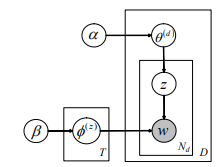

### latent semantics

let $w$ be the number of words, $d$ be the number of documents, and $t$ be the number of documents, and pick $q$ dimensions

LSA: $C = U D V^\top$ where $U \in \mathbb{R}^w \times q$ and $V \in \mathbb{R}^{q \times d}$  
topic model: $C = \Phi \Theta$ where $C \in \mathbb{R}^{w \times t}$ and $\Theta \in \mathbb{R}^{t \times d}$

**inference** on LDA

* $N = \sum N_d$ is total number of words
* $N_d$ is number of words in document $d$
* $N_k$ is the number of times topic $k$ is used
* $N_{k | d}$ is the number of times topic $k$ is used in document $d$
* $N_{i|k}$ is the number of times word $i$ is used in topic $k$

* prior: $(\prod_d Dir(\theta_d | \alpha)) \prod_k Dir(\phi_k | \beta))$
* likelihood: $(\prod_d \prod_k \theta_{k|d}^{N_{k|d}}) (\prod_k \prod_i \phi){i|k}^{N_{i|k}})$
* posterior: 
    * $\theta_d | D, Z \sim Dirichlet(\alpha + N_{k|d})$  
    * $phi | D, Z \sim Dirichlet(\beta + N_{i|k})$
    
but this assumes we observe topics $Z$ and have counts $N_k, N_{k|d}, N_{i|k}$

gibbs sampling: marginalize $\phi$, $\theta$ and sample $Z$  
$N^-, N_d^-, N_{k|d}^-, N_{i|k}^-$ are counts without $z^{j, d}, w^{j, d}$  
$p(z_k^{j, d} = 1 | D^-, Z^-) p(w^{j, d} = i | z_k^{j, d} = 1) \propto \frac{\alpha_k + N_{k|d}^-}{\alpha_0 + N_d^-} \frac{\beta_i + N_{i|k}^-}{\beta_0 + N_k^-}$

## Expectation Maximization

useful when can't marginalize variables directly  
i.e., no closed form of marginal probability

**e.g.** gaussian mixture model

model

* $Z_i \sim Discrete(\{p_j\})$
* $Y_i | Z_i \sim \mathcal{N}(\mu_{Z_i}, \Sigma_{Z_i})$

want to maximize $p(y | p_j, \mu_j, \Sigma_j) = \sum_z p(y, z | p_j, \mu_j, \Sigma_j)$

but we don't observe the $Z_i$

**e.g.** bayesian linear regression

$w \sim \mathcal{N}(0, \alpha^{-1} I)$  
$t | w \sim \mathcal{N}(\Phi w, \beta^{-1} I)$

want to maximize $p(t | \alpha, \beta) = \int_w p(t | w, \beta) p(w | \alpha) dw$

we don't observe $\alpha$, $\beta$

**algorithm**

initialize $\theta$

until convergence:

1. compute $Q(\theta^{new}, \theta^{old}) = E_{Z | Y, \theta^{old}}[\log p(Y, Z | \theta^{new})]$  
2. set $\theta^{old} = \arg\max_{\theta^{new}} Q(\theta^{new}, \theta^{old})$

hill-climbing method

**e.g.** gaussian mixture model

likelihood: $L = \prod_i \prod_j (p_j p(y_i | z_i = j))^{z_{ij}}$  
$= \prod_i \prod_j ( (2 \pi)^{-d/2} |\Sigma_j|^{-1/2} e^{-\frac{1}{2} (y_i - \mu_j)^\top \Sigma_j^{-1} (y_i - \mu_j)})^{z_{ij}}$

then $\ell = \sum_i \sum_j z_{ij} \log \alpha_{ij}$ where $\alpha_{ij}$ is the base of the exponent in the likelihood expression

$Q = E[\sum_{ij} Z_{ij} \log \alpha_{ij}^{new}]$
$= \sum_{ij} \log \alpha_{ij}^{new} E[Z_{ij}]$
$= \sum_{ij} \log \alpha_{ij}^{new} P(Z_{ij} = 1 | Y, \theta^{old})$  
$= \sum_{ij} \log \alpha_{ij}^{new} \frac{P(Z_{ij} = 1 | \theta^{old}) P(Y_i | Z_{ij} = 1, \theta^{old})}{\sum_l P(Z_{il} = 1 | \theta^{old}) P(Y_i | Z_{il} = 1, \theta^{old})}$  
$= \sum_{ij} \gamma_{ij} \log \alpha_{ij}^{new}$  
$= \sum_{ij} \gamma_{ij} (\log p_j^{new}  - \frac{1}{2} \log |\Sigma_j| - \frac{1}{2} (y_i - \mu_j)^\top \Sigma_j^{-1} (y_i - \mu_j))$

$\gamma_{ij}$ is the probability that $y_i$ is in class $j$ given current $\mu_j$, $\Sigma_j$

then update:
* $n_j = \sum_i \gamma_{ij}$ is the "count" of $y_i$ in class $j$  
* $\mu_j = n_j^{-1} \sum_i \gamma_{ij} y_i$  
* $\Sigma_j = n_j^{-1} \sum_i \gamma_{ij} (y_i - \mu_j)^\top (y_i - \mu_j)^\top$  
* $p_j = n_j / n$

**e.g.** bayesian linear regression

recall  
$S_n = (\alpha I + \beta \Phi^\top \Phi)^{-1}$  
$m_n = \beta S_n \Phi^\top t$

evidence = $p(t) = \int_w p(w) p(t | w) dw$

$p(w, t) \propto \alpha^{d/2} e^{-\frac{\alpha}{2} w^\top w} \beta^{n/2} e^{-\frac{\beta}{2} (t - \Phi w)^\top (t - \Phi w)}$

$Q = E_{p(w | t, \alpha^{old}, \beta^{old})}[\frac{d}{2} \log \alpha - \frac{\alpha}{2} w^\top w + \frac{n}{2} \log \beta - \frac{\beta}{2} t^\top t - \frac{\beta}{2} w^\top \Phi^\top \Phi w + \beta t^\top \Phi w]$  
$= \frac{d}{2} \log \alpha - \frac{\alpha}{2} (|m_n|^2 + tr(S_n)) + \frac{n}{2} \log \beta - \frac{\beta}{2} t^\top t - \frac{\beta}{2} m_n^\top \Phi^\top \Phi m_n - \frac{\beta}{2} tr(\Phi^\top \Phi S_n) + \beta t^\top \Phi m_n$

then to maximize $Q$ w.r.t. $\alpha, \beta$, take derivatives and set to 0 to get ...

$\alpha = \frac{d}{|m_n|^2 + tr(S_n)}$  
$\beta^{-1} = \frac{1}{n} |t - \Phi m_n|^2 + tr(\Phi^\top \Phi S_n)$

**lemma**

note that if $X \sim \mathcal{N}(\mu, \Sigma)$ ...

* $E[X] = \mu$
* $E[X^\top X] = \mu^\top \mu + tr(\Sigma)$
* $E[X^\top C X] = \mu^\top C \mu + tr(C \Sigma)$

**theorem**

if $Q(\theta^{new}, \theta^{old}) > Q(\theta^{old}, \theta^{old})$, then $p(y | \theta^{new}) > p(y | \theta^{old})$

proof

* let $Q_{new, old} - Q_{old, old} > 0$
* then $E[\log \frac{p(Y, Z | \theta^{new})}{p(Y, Z | \theta^{old})}]$  
$= E[\log \frac{p(Y | \theta^{new})}{p(Y | \theta^{old})} + \log \frac{p(Z | Y, \theta^{new})}{p(Z | Y, \theta^{old})}]$  
$= \log \frac{p(Y | \theta^{new})}{p(Y | \theta^{old})} + E[\log \frac{p(Z | Y, \theta^{new})}{p(Z | Y, \theta^{old})}]$
* the second term is less than zero since $\log$ is concave so the expectation of the log is less than the log of the expectation by Jensen's inequality, and the log of the expectation is just $\log 1 = 0$

what to do if we cannot compute posterior directly?

* so far we've seen
    * laplace approximation
    * mcmc
* alternatively
    * variational approximation
        * commit to "type of simple answer"
        * come up with some simplification of the posterior

## Variational Bayesian Methods

let $q(z) \in$ some family of simple distributions  
we want to find the "best" such $q(z)$  
"best": relate $q(z)$ to the true posterior $p(z | y)$  
minimize distance between possible $q(z)$ and true $p(z | y)$  
e.g., KL divergence

given family of distributions $Q$, we want to choose $q = \arg\min_Q d_{KL}(q(z) || p(z | y))$

but we don't know $p$

**def** KL divergence

given two densities $p_1$ and $p_2$ with distributions $P_1$ and $P_2$

$d_{KL}(P_1 || P_2) = \int p_1(x) \log \frac{p_1(x)}{p_2(x)} dx$

**corollary** KL divergence is nonnegative  
$-d_{KL}(P_1 || P_2) = \int p_1(x) \log \frac{p_2(x)}{p_1(x)} dx$  
$\leq \log p_1(x) \log \frac{p_2(x)}{p_1(x)}dx$ (Jensen's inequality)  
$= \log 1 = 0$

**corollary** KL divergence is not symmetric

let $\log p(y) = L + d_{KL}(q(z) || p(z | y))$  
$= \int q(z) \log \frac{p(z , y)}{q(z)} dz + \int q(z) \log \frac{q(z)}{p(z | y)} dz$  
$= \int q(z) \log \frac{p(y) p(z | y)}{q(z)} \frac{q(z)}{p(z | y)} dz$  
$= \int q(z) \log p(y) dz$  
$= \log p(y)$

so $p(y)$ is constant w.r.t. $z$

$\implies$ minimizing KL-divergence is the same as maximizing $L = \int q(z) \log \frac{p(z , y)}{q(z)} dz$ (evidence lower bound, variational lower bound) (ELBO, VLB)

since KL-divergence is positive, $L \leq -\log p(y)$

$L = E_{q(z | \theta)}[\log \frac{p(y, z)}{q(z)}]$  
$= E_{q(Z | \theta)}[\log p(Y, Z)] - E_{q(Z | \theta)}[\log q(Z | \theta)]$  
$= E[\log \log p(z)] + E[\log p(Y | Z)] - E[\log q(Z)]$  
$= E[\log p(Y | Z)] - d_{KL}(q(z) || p(z))$

suppose original model has hyperparameters $\phi$ and $q(z)$ has parameters $\theta$

**def** variational EM algorithm

expectation: maximize $L$ w.r.t. $\theta$  
assuming $\phi$ is fixed, pick best $q(z)$

maximization: maximize $L$ w.r.t. $\phi$  
assuming $q$ (and therefore $\theta$) is fixed, choose best $\phi$

EM is a special case of variational EM when $Q$ is not constrained  
expectation step picks $q(z) = p(z | y)$  
need to plug in new $q(z)$ into $L$ and consider maximization step  
so we use $q(z) = p(x | y, \phi^{old})$  
$E_{Z | Y, \phi^{old}}[\log p(Y, Z | \phi^{new}) - E_{Z | Y, \phi^{old}}[\log p(Z | Y, \phi^{old}]$  
maximization step is finding $\phi$ that maximizes the above, and the second term does not depend on $\phi^{new}$ so we can discard it  
so we are left with $Q(\phi^{new}, \phi^{old})$ from EM

### relating to variational autoencoders

$\sum \log p(y_i) \geq \sum_i E_{q(Z_i)} [\log p(Z_i | Y_i)] - d_{KL}(q(z_i), p(z_i))$

$q(z_i)$ implicitly depends on $y_i$

VAE makes dependence explicit  
$q(z_i | y_i, \theta)$  
represented as neural network  
also represent $p(y_i | z_i)$ as neural network

decoder is now $p(y_i | z_i, W_1)$  
encoder is $q(z_i | y_i, W_2)$

# Course Summary

* ML as optimization
* probability models
* bayesian models
* model selection
* graphical models
* deep models
* deep models + architecture
* deep + bayesian models